In [5]:
import torch

def export_to_onnx(model_path="best.pt", onnx_path="best.onnx"):
    model = torch.load(model_path, map_location=torch.device('cpu'))
    model.eval()
    dummy_input = torch.randn(1, 3, 375, 1242)
    torch.onnx.export(
        model,
        dummy_input,
        onnx_path,
        export_params=True,
        opset_version=11,
        do_constant_folding=True,
        input_names=['input'],
        output_names=['output'],
        dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
    )
    print(f"Model exported to {onnx_path}")

# Usage:
export_to_onnx("runs/detect/yolov8m_kitti_enhanced/weights/best.pt", "best.onnx")

Model exported to runs/detect/yolov8m_kitti_enhanced/weights/best.onnx


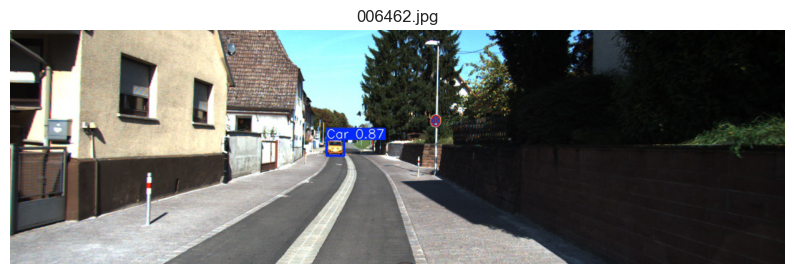

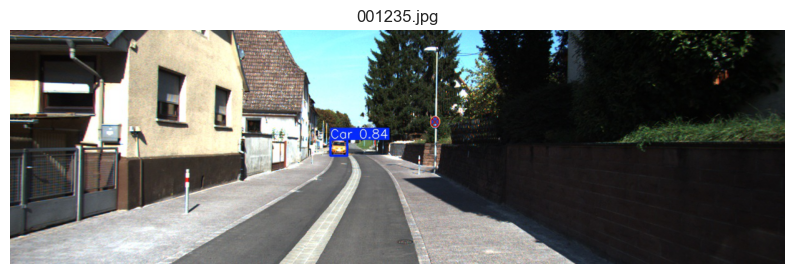

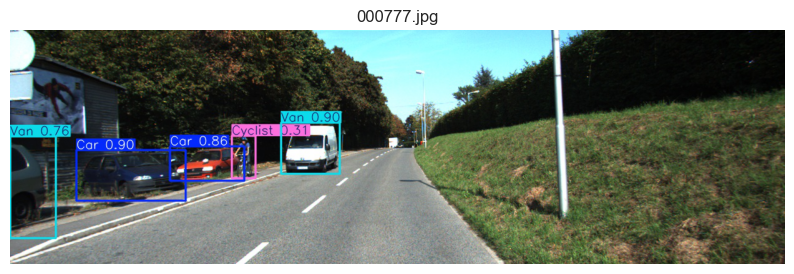

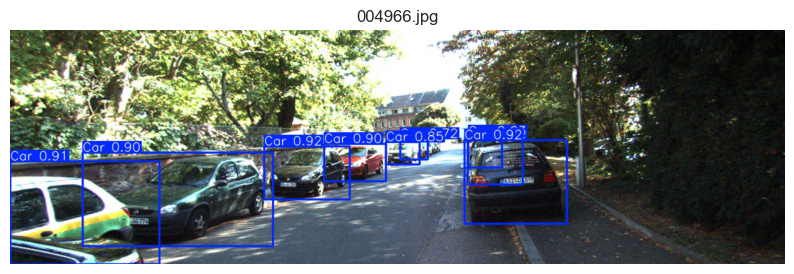

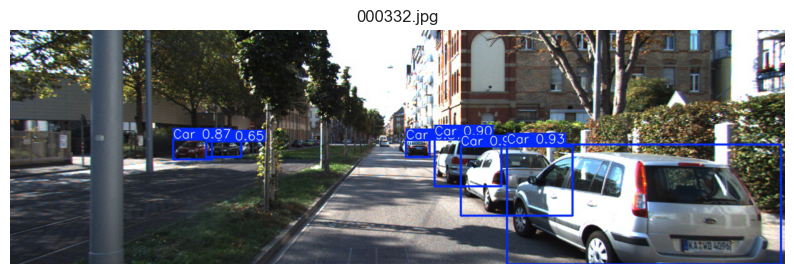

In [6]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

def visualize_predictions(pred_dir, num_samples=5):
    pred_images = [f for f in os.listdir(pred_dir) if f.endswith(('.jpg', '.png'))]
    sample_images = random.sample(pred_images, num_samples)

    for img_name in sample_images:
        img_path = os.path.join(pred_dir, img_name)
        img = Image.open(img_path)
        
        # Create a new figure for each image
        plt.figure(figsize=(10, 10))  # Large figure size for each image
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_name)
        plt.show()  # Show each image immediately

# Example usage
visualize_predictions('predictions/exp', num_samples=5)

In [8]:
from ultralytics import YOLO

# Load your best model
model = YOLO("runs/detect/yolov8m_kitti_enhanced/weights/best.pt")

# Run prediction on a video
results = model.predict(
    source="testVid/KITTI.mp4",   # your video file
    conf=0.3,               # confidence threshold
    iou=0.5,                # IoU threshold
    imgsz=640,              # image size
    device=0,               # GPU (use device='cpu' if no GPU)
    save=True,              # save output video
    project="predictions",  # main save folder
    name="traffic_pred",    # subfolder name
    exist_ok=True           # avoid errors if folder exists
)

print("✅ Video predictions saved in 'predictions/traffic_pred'")



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs
video 1/1 (frame 1/1001) C:\Fares\CSED\Training\DEPI\AV-Object-Detection\testVid\KITTI.mp4: 224x640 4 Cars, 1 Truck, 1 Pedestrian, 82.9ms
video 1/1 (frame 2/1001) C:\Fares\CSED\Training\DEPI\AV-Object-Detection\testVid\KITTI.mp4: 224x640 4 Cars, 1 Truck, 1 Pedestrian, 31.4ms
video 1/1 (frame 3/1001) C:\Fares\CSED\Training\DEPI\AV-Object-Detection\testVid\KITTI.mp4: 224x640 4 Cars, 1 Truck, 1 Pedestrian, 29.3ms
video 1/1 (frame 4/1001) C:\Fares\CSED\Trainin

In [9]:
from ultralytics import YOLO
import cv2


# Open the video file
cap = cv2.VideoCapture("testVid/KITTI.mp4")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # End of video

    # Run YOLO prediction on the frame
    results = model.predict(
        source=frame,
        conf=0.3,
        iou=0.5,
        imgsz=640,
        device=0,
        verbose=False
    )

    # Draw the results on the frame
    annotated_frame = results[0].plot()

    # Show the frame
    cv2.imshow("YOLOv8 Real-Time Detection", annotated_frame)

    # Press 'q' to quit early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Clean up
cap.release()
cv2.destroyAllWindows()
